In [1]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import nibabel as nib

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

from utils.preproc import load_data, extract_event_info, create_event_dataframe
from utils.glm import run_glm_analysis, compute_contrasts, plot_contrasts
from utils.psth import map_events_to_frame_times, process_activation, proc_pixel


# GLM

In [2]:
def glm(data_dir, brain_filename, event_filename):
    brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
    behave_codes, absolute_starttime = extract_event_info(event_mat, method='glm')
    event_df = create_event_dataframe(behave_codes, absolute_starttime, method='glm')
    labels, estimators, X = run_glm_analysis(brain_data, event_df)
    contrast_results = compute_contrasts(labels, estimators, X)
    plot_contrasts(contrast_results, brain_data.shape)

## 05/31/2024 Plane 7.5

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


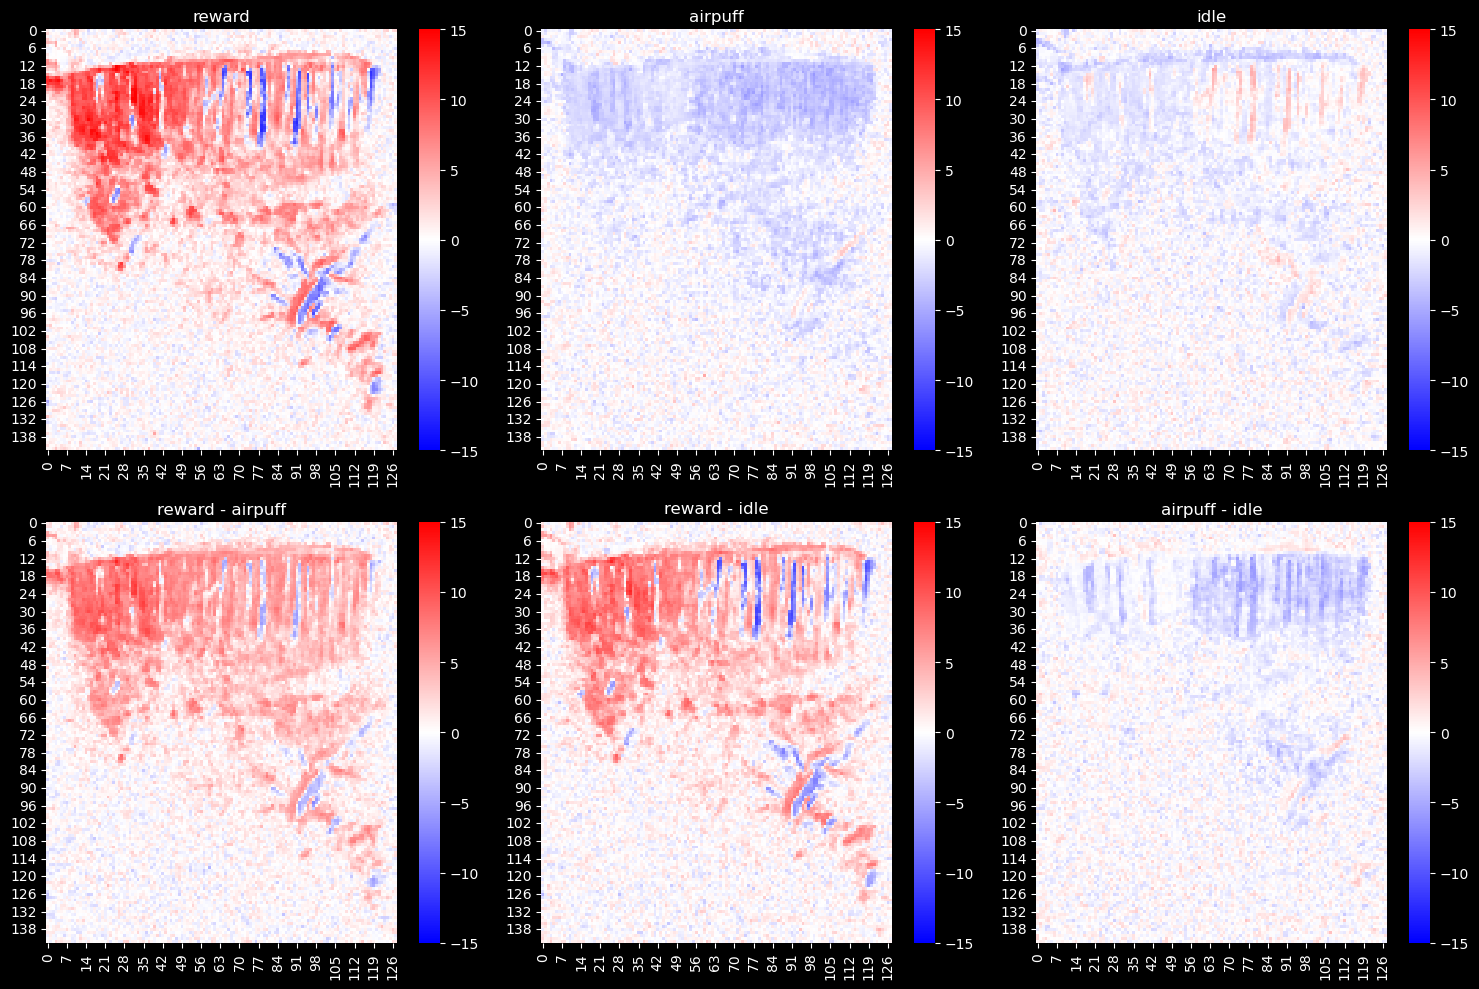

In [3]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0531_7.5'
brain_filename = 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii'
event_filename = 'mldata.mat'
    
glm(data_dir, brain_filename, event_filename)

## 06/03/2024 Plane 8.5

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


/Users/yibeichen/micromamba/envs/neuro/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: raw_onset
  warnings.warn(


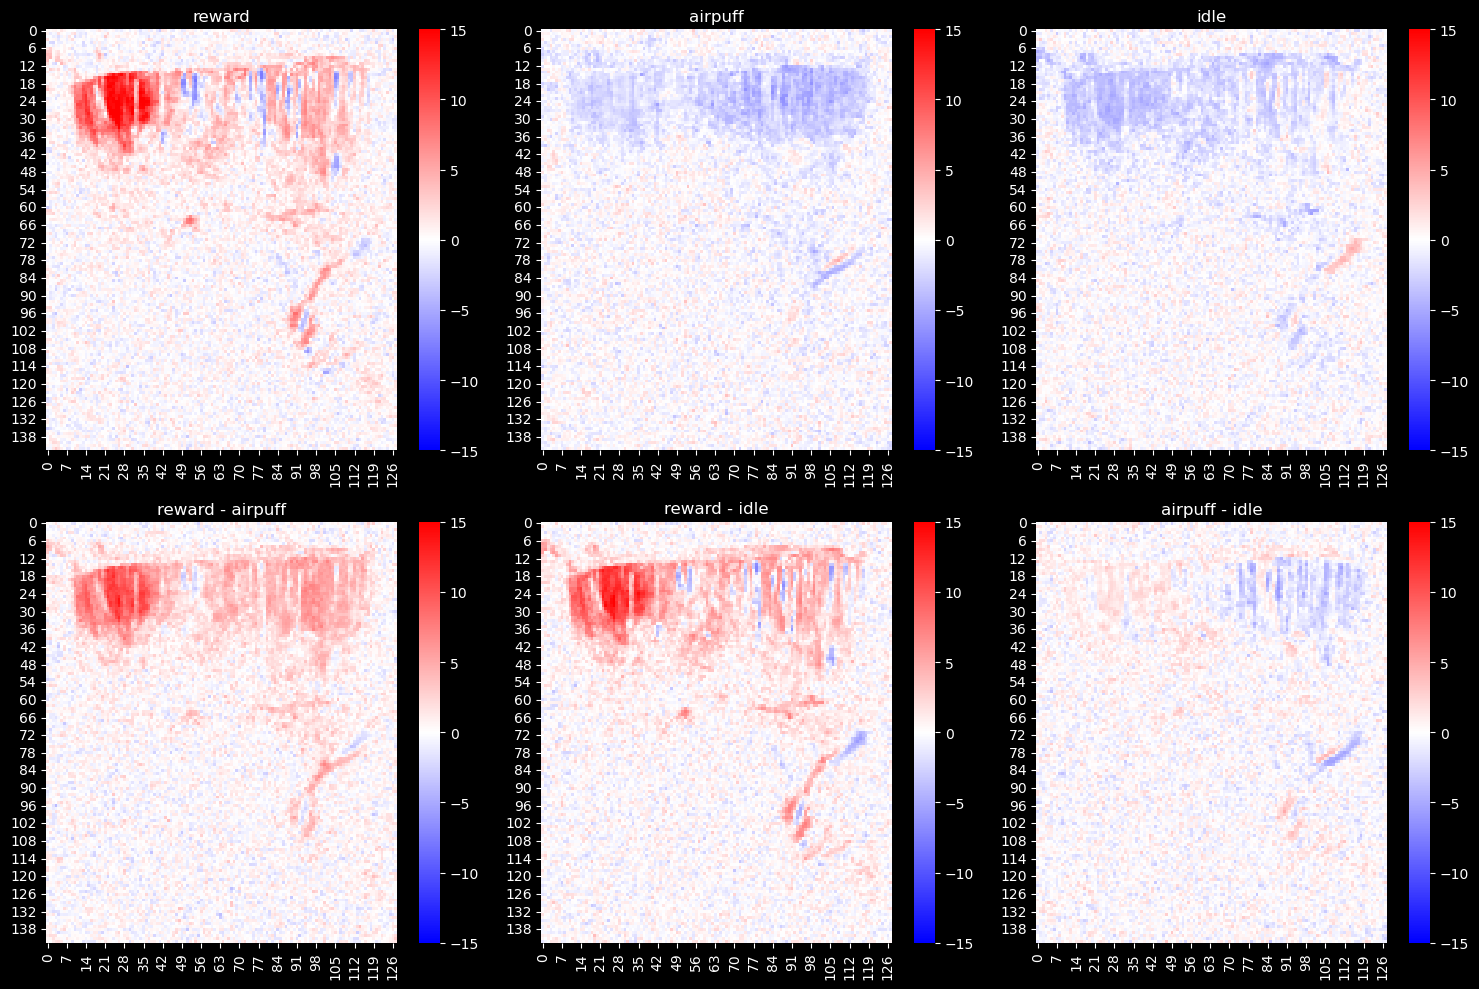

In [4]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0603_8.5'
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
event_filename = 'mldata.mat'
    
glm(data_dir, brain_filename, event_filename)

# PSTH

In [5]:
# Function to plot heatmaps
def plot_heatmaps(data, brain_data, title_prefix, tasks=['Reward', 'Airpuff', 'Idle']):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, ax in enumerate(axes):
        sns.heatmap(data[:, i].reshape(brain_data.shape[0], brain_data.shape[2]).T, ax=ax, cmap="bwr", vmin=-0.2, vmax=0.2)
        ax.set_title(f"{title_prefix}: {tasks[i]}")

    plt.tight_layout()
    plt.show()


In [6]:
def psth(data_dir, brain_filename, event_filename):
    brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
    behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
    event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')

    tr = 1 / 2.5
    n_tr = brain_data.shape[-1]
    frame_times = np.arange(n_tr) * tr

    event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

    Y = brain_data.reshape(-1, brain_data.shape[-1])
    n_pixels = Y.shape[0]

    # cue_activation_normalized = process_activation(Y, event_df, n_pixels, 12, 24, desc="Processing Cue Activations")
    stimulus_activation_normalized = process_activation(Y, event_df1, n_pixels, 24, 50, desc="Processing Stimulus Activations")


    # plot_heatmaps(cue_activation_normalized, "Cue")
    plot_heatmaps(stimulus_activation_normalized, brain_data, "Stimulus")

## 05/31/2024 Plane 7.5

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


Processing Stimulus Activations: 100%|██████████| 18304/18304 [00:16<00:00, 1095.95it/s]


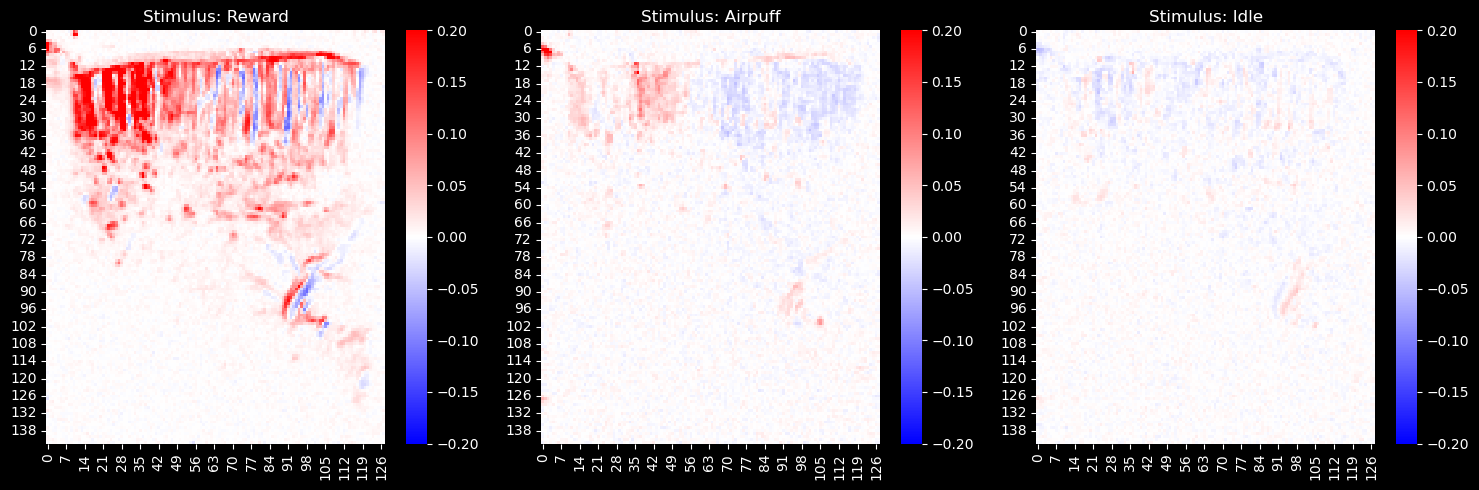

In [7]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0531_7.5'
brain_filename = 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii'
event_filename = 'mldata.mat'
    
psth(data_dir, brain_filename, event_filename)

## 06/03/2024 Plane 8.5

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


Processing Stimulus Activations: 100%|██████████| 18304/18304 [00:16<00:00, 1099.62it/s]


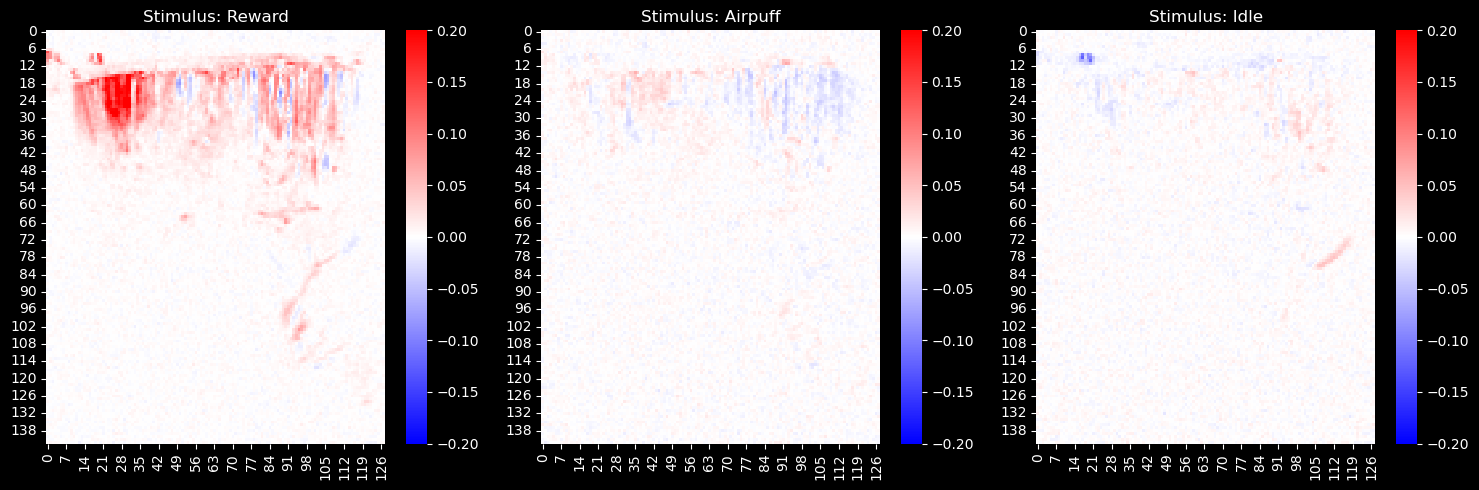

In [8]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0603_8.5'
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
event_filename = 'mldata.mat'

psth(data_dir, brain_filename, event_filename)

# Pixel Data Plotting

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


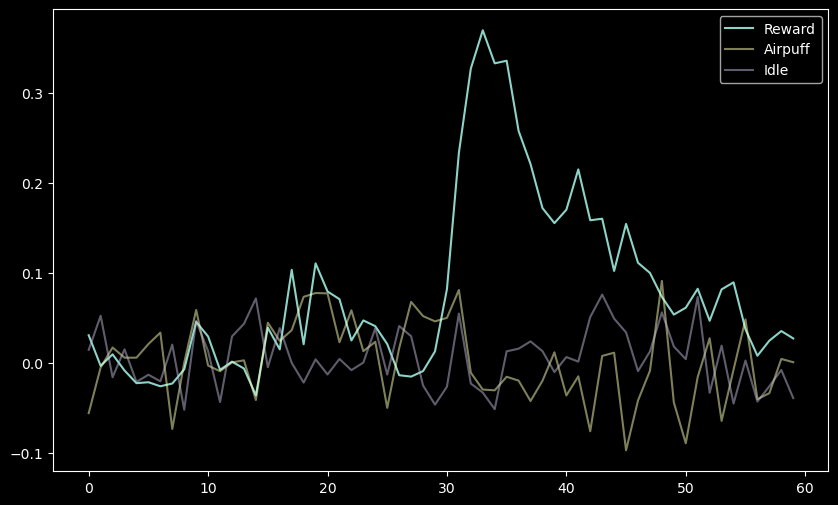

In [9]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0531_7.5'
brain_filename = 'Grouper_audiocue_053124_fus2D.2Dscan_2_fus2D.source.nii'
event_filename = 'mldata.mat'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')


tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

i, j = 25, 25
pixel_data = brain_data[i,0,j,:].reshape(-1,1)
normalized_data = proc_pixel(pixel_data, event_df1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the three lines
plt.plot(np.nanmean(normalized_data[0], axis=0), label='Reward')  
plt.plot(np.nanmean(normalized_data[1], axis=0), label='Airpuff', alpha=0.5) 
plt.plot(np.nanmean(normalized_data[2], axis=0), label='Idle', alpha=0.5) # Third line

# # Adding titles and labels
# plt.title('Three Lines in One Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

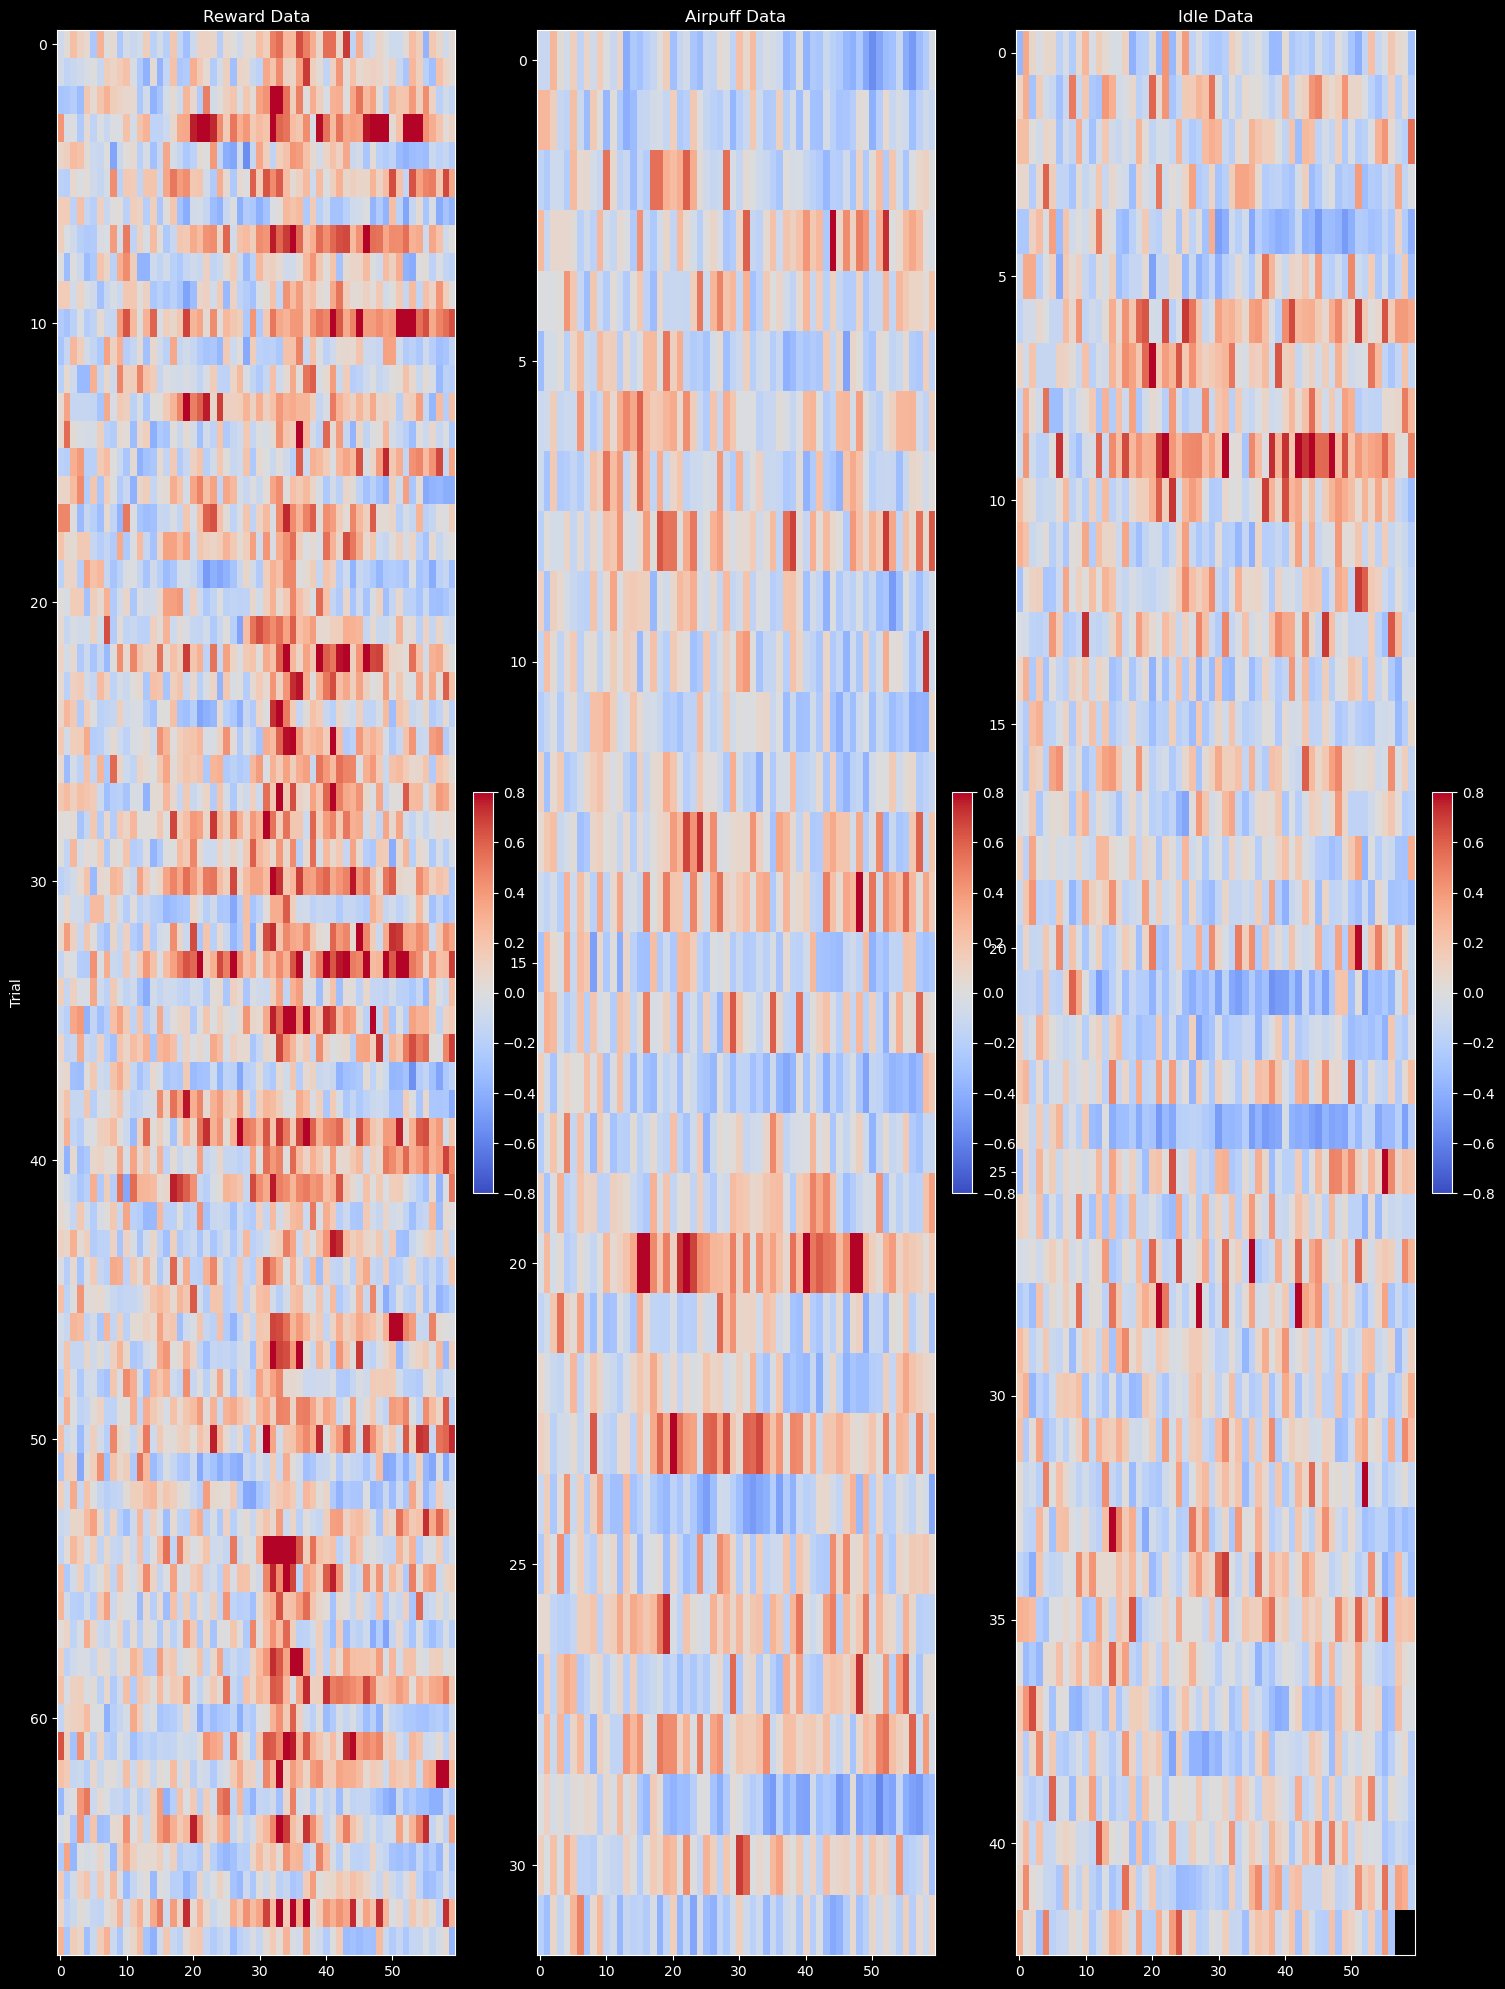

In [10]:
fig = plt.figure(figsize=(18, 25))  # Adjust the figure size to accommodate three plots

# Use GridSpec to control the layout
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)  # Three equal-width plots

min_val = -0.8
max_val = 0.8
# First plot (reward_data)
ax0 = fig.add_subplot(gs[0])
im0 = ax0.imshow(normalized_data[0], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax0.set_title('Reward Data')
ax0.set_ylabel('Trial')
# ax0.set_xticks([])  # Adjust or remove ticks as needed

# Second plot (airpuff_data)
ax1 = fig.add_subplot(gs[1])
im1 = ax1.imshow(normalized_data[1], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax1.set_title('Airpuff Data')
# ax1.set_xticks([])  # Adjust or remove ticks as needed
# ax1.set_yticks([])

# Third plot (idle_data)
ax2 = fig.add_subplot(gs[2])
im2 = ax2.imshow(normalized_data[2], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax2.set_title('Idle Data')
# ax2.set_xticks([])  # Adjust or remove ticks as needed
# ax2.set_yticks([])

# Add colorbars (optional)
plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.show()

pixdim[1,2,3] should be positive; setting to abs of pixdim values


Brain data shape: (128, 1, 143, 9000)


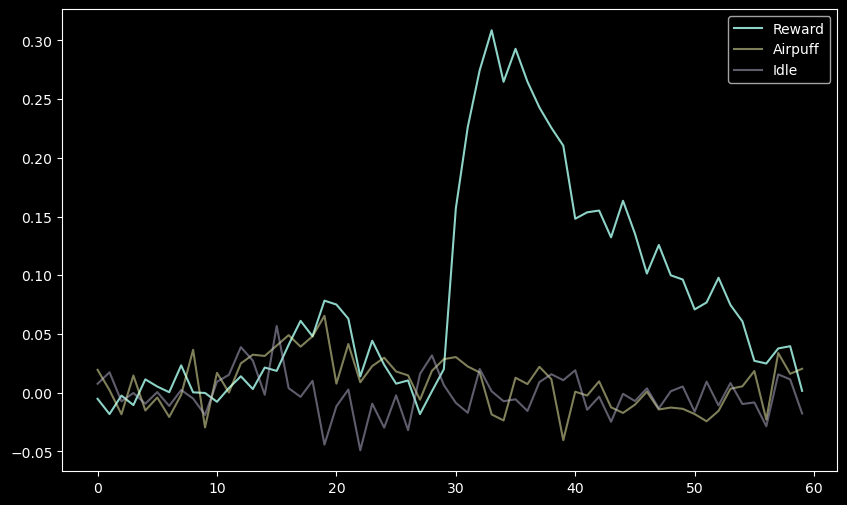

In [11]:
data_dir = '/Users/yibeichen/Desktop/fusi/task_data/Grouper_Audiocue_data/Grouper_0603_8.5'
brain_filename = 'Grouper_audiocue_060324_fus2D.2Dscan_1_fus2D.source.nii'
event_filename = 'mldata.mat'

brain_data, event_mat = load_data(data_dir, brain_filename, event_filename)
behave_codes, absolute_starttime = extract_event_info(event_mat, method='psth')
event_df = create_event_dataframe(behave_codes, absolute_starttime, method='psth')

tr = 1 / 2.5
n_tr = brain_data.shape[-1]
frame_times = np.arange(n_tr) * tr

event_df1, event_binary_df = map_events_to_frame_times(event_df, frame_times)

i, j = 25, 25
pixel_data = brain_data[i,0,j,:].reshape(-1,1)
# pixel_data = Y[i, :].reshape(-1, 1)  # Ensure pixel_data is 2D
normalized_data = proc_pixel(pixel_data, event_df1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the three lines
plt.plot(np.nanmean(normalized_data[0], axis=0), label='Reward')  
plt.plot(np.nanmean(normalized_data[1], axis=0), label='Airpuff', alpha=0.5) 
plt.plot(np.nanmean(normalized_data[2], axis=0), label='Idle', alpha=0.5) # Third line

# # Adding titles and labels
# plt.title('Three Lines in One Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

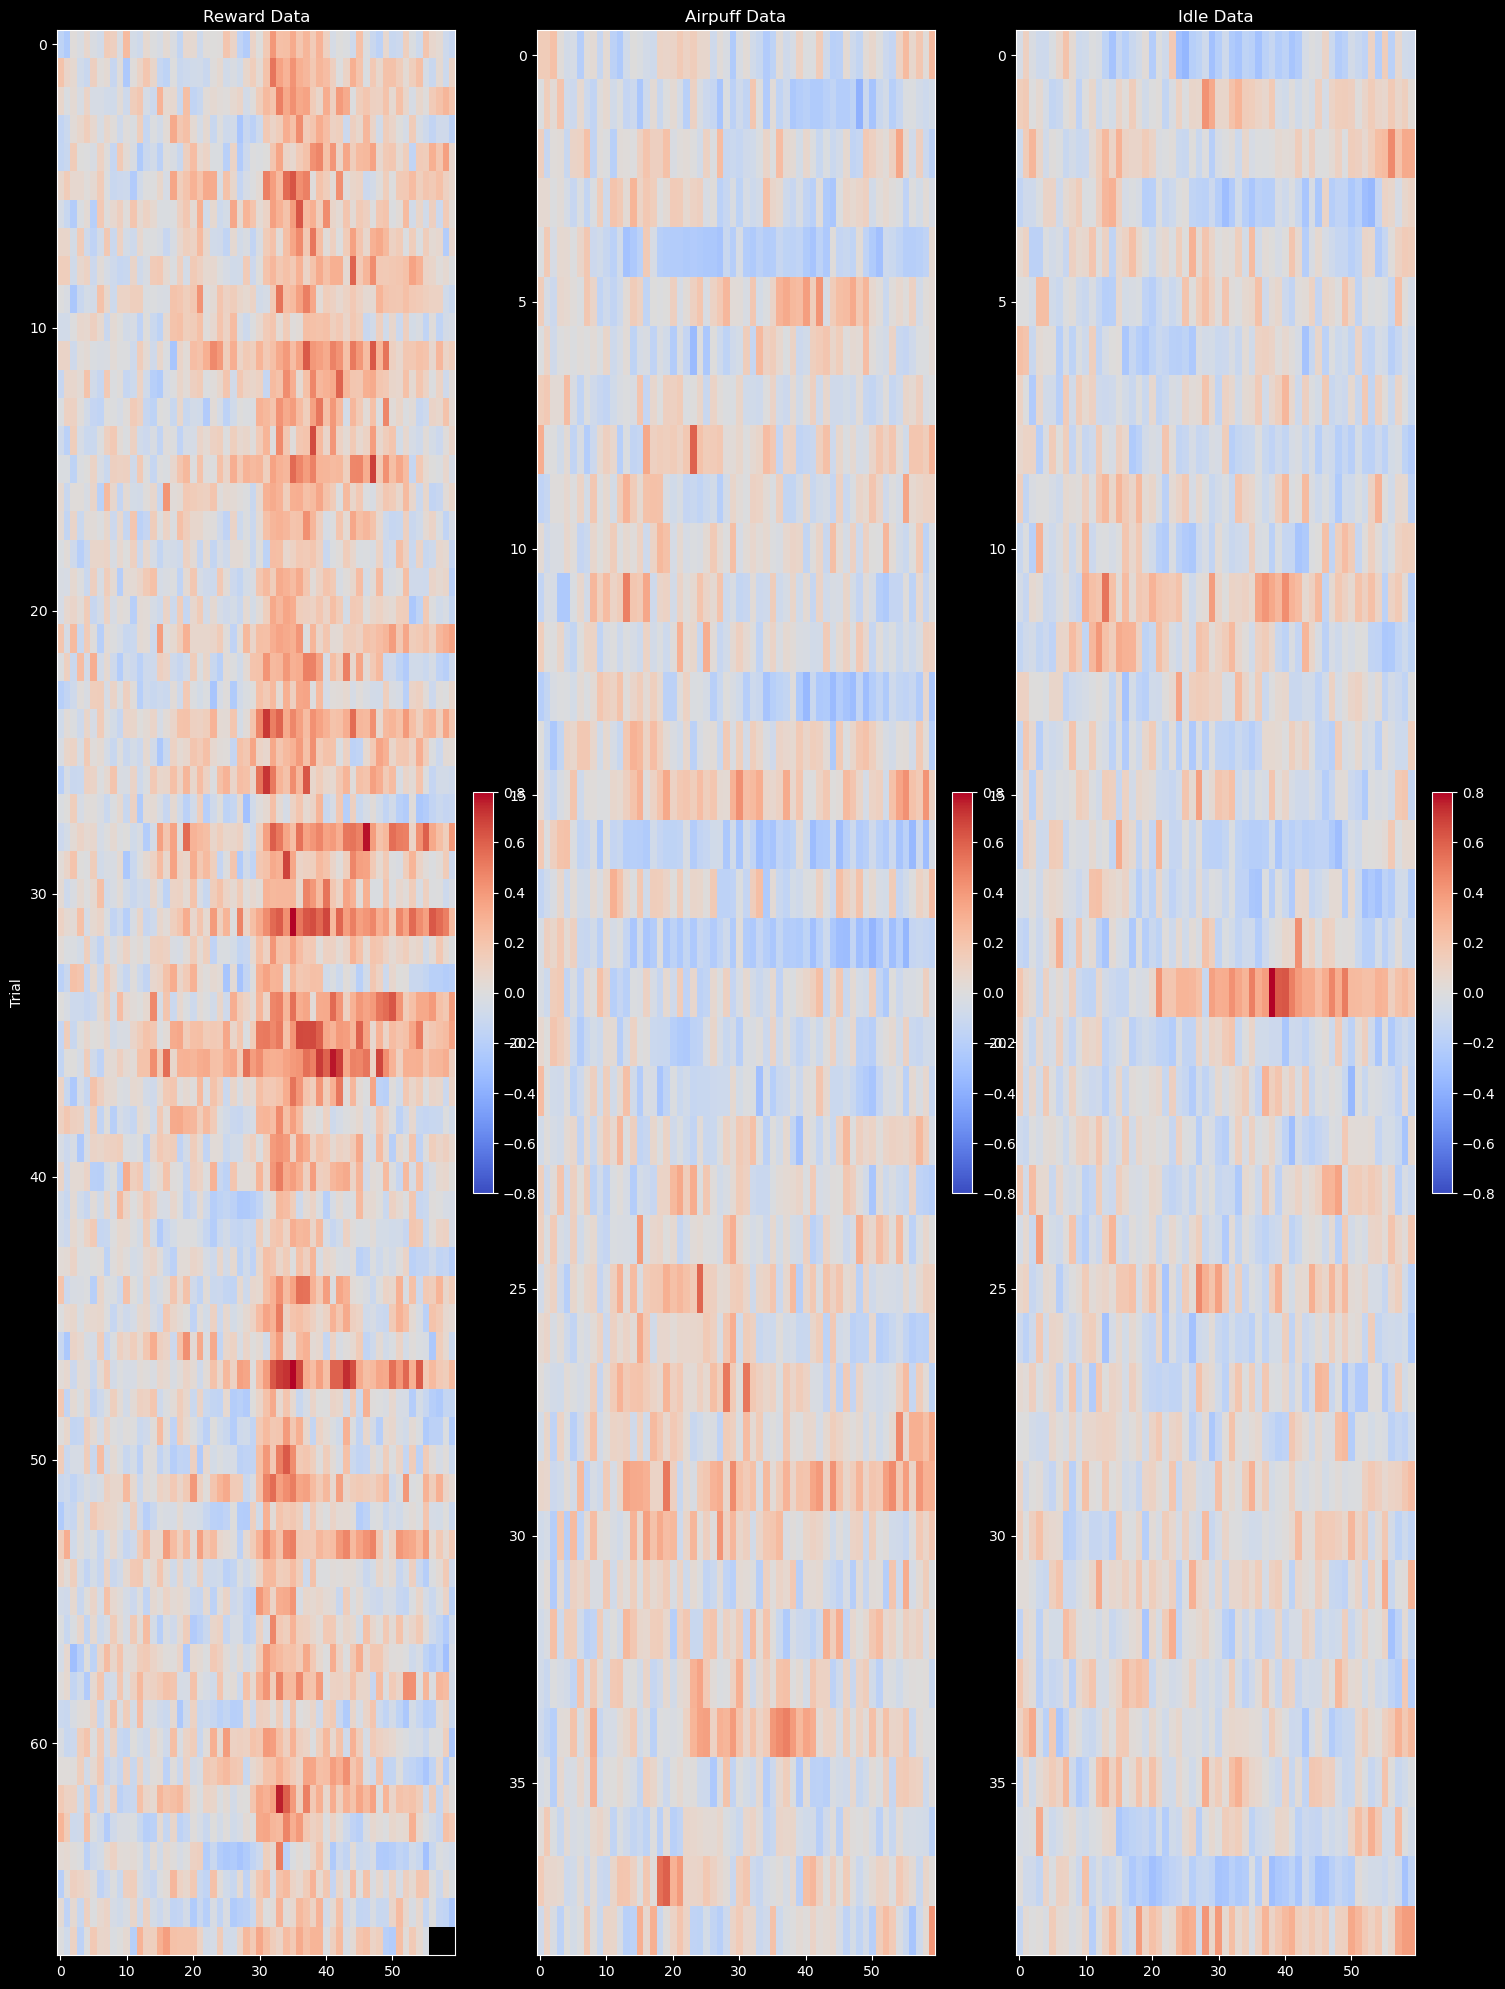

In [12]:
fig = plt.figure(figsize=(18, 25))  # Adjust the figure size to accommodate three plots

# Use GridSpec to control the layout
gs = GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.1)  # Three equal-width plots

min_val = -0.8
max_val = 0.8
# First plot (reward_data)
ax0 = fig.add_subplot(gs[0])
im0 = ax0.imshow(normalized_data[0], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax0.set_title('Reward Data')
ax0.set_ylabel('Trial')
# ax0.set_xticks([])  # Adjust or remove ticks as needed

# Second plot (airpuff_data)
ax1 = fig.add_subplot(gs[1])
im1 = ax1.imshow(normalized_data[1], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax1.set_title('Airpuff Data')
# ax1.set_xticks([])  # Adjust or remove ticks as needed
# ax1.set_yticks([])

# Third plot (idle_data)
ax2 = fig.add_subplot(gs[2])
im2 = ax2.imshow(normalized_data[2], cmap='coolwarm', aspect='auto', vmin=min_val, vmax=max_val)
ax2.set_title('Idle Data')
# ax2.set_xticks([])  # Adjust or remove ticks as needed
# ax2.set_yticks([])

# Add colorbars (optional)
plt.colorbar(im0, ax=ax0, fraction=0.046, pad=0.04)
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.show()

In [13]:
pixel_data.shape

(9000, 1)

In [14]:
brain_data[25,0,25,:].reshape(-1,1).shape

(9000, 1)